# Q5b

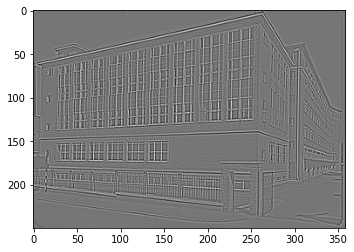

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = plt.imread("https://raw.githubusercontent.com/CambridgeEngineering/PartIA-Computing-Examples-Papers/master/images/southwing.png")
n = 3
B = np.zeros(A.shape)
G = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])


def image_convolution(A, G, B, n):
    for i in range(1, B.shape[0] - 1):
        for j in range(1, B.shape[1] - 1):
            for k in range(n):
                for l in range(n):
                    B[i, j] += G[k, l] * A[(i - n // 2 + k), (j - n // 2 + l)]
    return B


plt.imshow(image_convolution(A, G, B, n), cmap='gray')


# Q6

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
import urllib
from IPython.display import Audio


# Fetch the clip
url = "https://www.nasa.gov/62284main_onesmall2.wav"
Audio(url)

# Fetch sound file
local_filename, headers = urllib.request.urlretrieve(url)

# Read frequency (sample rate fs) and data array (x) for sound track
fs, x = scipy.io.wavfile.read(local_filename)

print("The frequency is {}".format(fs))
print("The data array is {}".format(x))

# If we have a stero track (left and right channels), take just the first channel
if len(x.shape) > 1:
    x = x[:, 0]

# Check that it plays
Audio(x, rate=fs)

The frequency is 11025
The data array is [108 108 110 ... 128 124 124]


Plotting the signal:

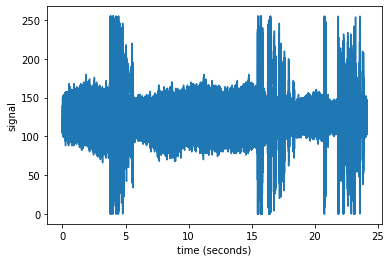

In [10]:
# Time points (0 to T, with T*fs points)
t = np.linspace(0, len(x)/fs, len(x), endpoint=False)

# Plot signal
plt.plot(t, x)
plt.xlabel('time (seconds)')
plt.ylabel('signal');

Performing the Fourier transform:

Decompose it into its frequency components, and plot with a log scale in the signal axis:

Text(0, 0.5, '$\\hat{x}$')

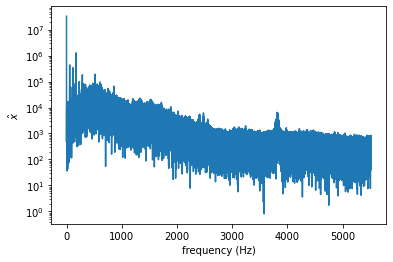

In [14]:
# Perform discrete Fourier transform (real signal)
xf = np.fft.rfft(x)

# Create frequency axis for plotting
freq = np.linspace(0.0, fs/2, len(xf))

plt.semilogy(freq, np.abs(xf))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$')

Filtering and inverse transform:

We can filter out selected frequency ranges

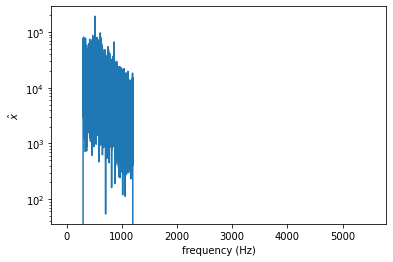

In [60]:
# Create copy of transformed signal
xf_filtered = xf.copy()

#Cut-off frequencies (Hz)
cutoff_freq_low = 300
cutoff_freq_high = 1200

# Cut-off indices in transform array
n_cut_low = int(2*cutoff_freq_low*len(xf_filtered)/fs)
n_cut_high = int(2*cutoff_freq_high*len(xf_filtered)/fs)

# Remove low and high frequencies
xf_filtered[:n_cut_low] = 0.0
xf_filtered[n_cut_high:] = 0.0

# Plot filtered transform 
plt.semilogy(freq, np.abs(xf_filtered))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');

Transform back to time domain:

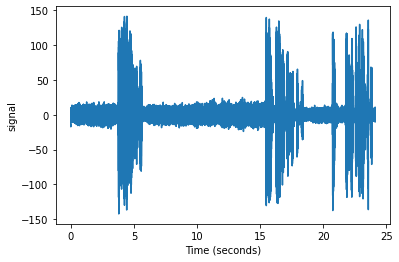

In [61]:
# Perform inverse transform on filtered signal
x_filtered = np.fft.irfft(xf_filtered)

# Plot signal
plt.plot(t, x_filtered)
plt.xlabel('Time (seconds)')
plt.ylabel('signal');

In [62]:
Audio(x_filtered, rate=fs)

# Q7


### (a)

In [68]:
def newton_1d(g, dgdx, x0, tol, max_it = 50):
  r0 = np.abs(g(x0))
  for i in range(max_it):
    x = x0 - g(x0)/dgdx(x0)
    x0 = x

    #Find df(x^k)/dx
    r = np.abs(g(x0))
    print("Current ratio:", r/r0)
    if r/r0 < tol:
      return x
  
  return None

Testing quadratic cost function

In [65]:
def f(x):
  return x*x

def dfdx(x):
  return 2*x
  
def df2dx2(x):
  return 2.0

x_opt = newton_1d(dfdx, df2dx2, 1.0, 1.0e-8)
print("Optimal x and f(x):", x_opt, f(x_opt))

0.0
Optimal x and f(x): 0.0 0.0


Testing f(x) = x^3 + x^2

In [69]:
def f(x):
  return x**3 + x**2

def dfdx(x):
  return 3*x**2 + 2*x

def df2dx2(x):
  return 6*x + 2.0

x_opt = newton_1d(dfdx, df2dx2, 1.0, 1.0e-8)
print("Optimal x and f(x):", x_opt, f(x_opt))

Current ratio: 0.234375
Current ratio: 0.045617971453287186
Current ratio: 0.004633312611494086
Current ratio: 7.527206169331141e-05
Current ratio: 2.122309967133394e-08
Current ratio: 1.6890743081746181e-15
Optimal x and f(x): 4.2226857704365185e-15 1.783107511584713e-29


### (b)


In [73]:
def newton_mult(g, J, x0, tol, max_it=100):
  r0 = np.linalg.norm(g(x0))
  for i in range(max_it):
    x = x0 - np.linalg.solve(J(x0), g(x0))
    x0 = x

    r = np.linalg.norm(g(x0))
    print("Current ratio:", r/r0)
    if r/r0 < tol:
      return x
  
  return None

Implementing in Rosenbrock function

In [74]:
def f(x):
  return (a - x[0])**2 + b*(x[1] - x[0]**2)**2

def g(x):
  return np.array([-2*(a-x[0]) - 4*x[0]*b*(x[1]-x[0]**2),
           2*b*(x[1] - x[0]**2)])
  
def J(x):
  d2fdx2 = 2 - 4*b*x[1] + 12*b*x[0]**2
  d2fdxdy = -4*b*x[0]
  d2fdy2 = 2*b

  return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

In [75]:
a, b = 2, 100
x_opt = newton_mult(g, J, [1.1, 1.1], 1.0e-9)

print("f_min =", f(x_opt))
print("Values of x0 and x1:", x_opt)

Current ratio: 0.020741586063277816
Current ratio: 6.284844795657698
Current ratio: 0.007670117085122962
Current ratio: 0.6356510917098246
Current ratio: 7.241299900211666e-06
Current ratio: 5.583845715573086e-07
Current ratio: 7.114711126311004e-15
f_min = 1.9770826437101608e-29
Values of x0 and x1: [2. 4.]


(c) When the function is quadratic

(d) ***Input a quadratic equation and see whether it converges in one iteration.***

Test output values with functions with known minima points and minima values

# Q8

## (a)

In [76]:
class Rosenbrock:
  """A class that represents the Rosenbrock function"""

  def __init__(self, a, b):
    """Initialiser that takes the a and b parameters"""
    self.a = a
    self.b = b
  
  def f(self, x):
    return (self.a - x[0])**2 + self.b*(x[1] - x[0]**2)**2
  
  def g(self, x):
    return np.array([-2*(self.a-x[0]) - 4*x[0]*self.b*(x[1]-x[0]**2),
             2*self.b*(x[1] - x[0]**2)])
  
  def J(self, x):
    d2fdx2 = 2 - 4*self.b*x[1] + 12*self.b*x[0]**2
    d2fdxdy = -4*self.b*x[0]
    d2fdy2 = 2*self.b

    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

Why is it necessary to give a "self." in front of the parameters? (I forgot about the function of "self")

Why are we using problem instead of using the normal g and J?

# (b)

In [77]:
def newton(problem, x0, tol, max_it=100):
  r0 = np.linalg.norm(problem.g(x0))
  for i in range(max_it):
    x = x0 - np.linalg.solve(problem.J(x0), problem.g(x0))
    x0 = x

    r = np.linalg.norm(problem.g(x0))
    print("The ratio is:", r/r0)
    if r/r0 < tol:
      return x
  
  return None

In [78]:
rosenbrock_problem = Rosenbrock(2, 100)
x_opt = newton(rosenbrock_problem, [1.1, 1.1], 1.0e-9)

print("f_min =", rosenbrock_problem.f(x_opt))
print("Values of x0 and x1:", x_opt)

The ratio is: 0.020741586063277816
The ratio is: 6.284844795657698
The ratio is: 0.007670117085122962
The ratio is: 0.6356510917098246
The ratio is: 7.241299900211666e-06
The ratio is: 5.583845715573086e-07
The ratio is: 7.114711126311004e-15
f_min = 1.9770826437101608e-29
Values of x0 and x1: [2. 4.]
